In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fake_jobs = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')

##**Exploration Phase**

In [ ]:
# Displaying the first 5 rows
fake_jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
fake_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
fake_jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
percent_missing = fake_jobs.isnull().sum() * 100 / len(fake_jobs)
missing_value_fake_jobs = pd.DataFrame({'column_name': fake_jobs.columns,
                                 'percent_missing': percent_missing})
missing_value_fake_jobs

,column_name,percent_missing
job_id,job_id,0.000000
title,title,0.000000
location,location,1.935123
department,department,64.580537
salary_range,salary_range,83.959732
company_profile,company_profile,18.501119
description,description,0.005593
requirements,requirements,15.072707
benefits,benefits,40.324385
telecommuting,telecommuting,0.000000


In [ ]:
fake_jobs.duplicated().sum()

0

In [ ]:
# fake_jobs = fake_jobs.replace("-", np.nan)
fake_jobs.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

## **Conclusion**
**Wrong data types**

No wrong data type in the dataset

---
**Number of null values**
* location        ➡         346
* department         ➡     11547 ❗
* salary_range      ➡     15012 ❗
* company_profile   ➡      3308
* description       ➡         1
* requirements    ➡        2695
* benefits         ➡       7210
* employment_type   ➡      3471
* required_experience ➡    7050 
* required_education ➡     8105 ❗
* industry         ➡       4903
* function          ➡      6455
* fraudulent         ➡        0



---

**Unwanted Columns**
*   department
*   salary_range
*   required_education
*   job_id    
*   required_education
*  department  
*  salary_range  
*  company_profile  
*	 description  
*	 requirements  
*  benefits      
 




#Cleaning Phase

In [ ]:
fake_jobs = fake_jobs.drop(['job_id', 'required_education', 'department', 'salary_range',
                            'company_profile',	'description',	'requirements',
                            'benefits'], axis=1)

In [ ]:
fake_jobs['location'] = fake_jobs['location'].fillna(fake_jobs['location'].mode()[0])
fake_jobs['employment_type'] = fake_jobs['employment_type'].fillna(fake_jobs['employment_type'].mode()[0])
fake_jobs['required_experience'] = fake_jobs['required_experience'].fillna(fake_jobs['required_experience'].mode()[0])
fake_jobs['industry'] = fake_jobs['industry'].fillna(fake_jobs['industry'].mode()[0])
fake_jobs['function'] = fake_jobs['function'].fillna(fake_jobs['function'].mode()[0])

###After clearning 

In [ ]:
fake_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   telecommuting        17880 non-null  int64 
 3   has_company_logo     17880 non-null  int64 
 4   has_questions        17880 non-null  int64 
 5   employment_type      17880 non-null  object
 6   required_experience  17880 non-null  object
 7   industry             17880 non-null  object
 8   function             17880 non-null  object
 9   fraudulent           17880 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.4+ MB


## **Analysis Phase**
In this phase, we will use tow methods to answer our questions, and these methods are:
* **Exploratory Analysis**
* **Visual Analysis** 

But first, we need to define our questions.

> ## Questions
1. Is there a correlation between the variables?
2. What is the top 5 most on demand jobs?
3. Percentage of employment type
4. Is there a difference in required experience?
5. What is the fraudulent percentage?
6. What is the fraudulent for the top 5 industries?

**Now, Let’s Start Answering these questions**

In [ ]:
sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [6, 5]})

### Is there a correlation between the variables?

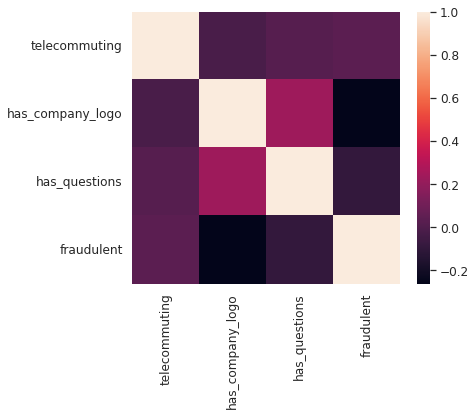

In [ ]:
#Correlation plot
sns.heatmap(fake_jobs.corr())

### What is the top 5 most on demand jobs?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of jobs')

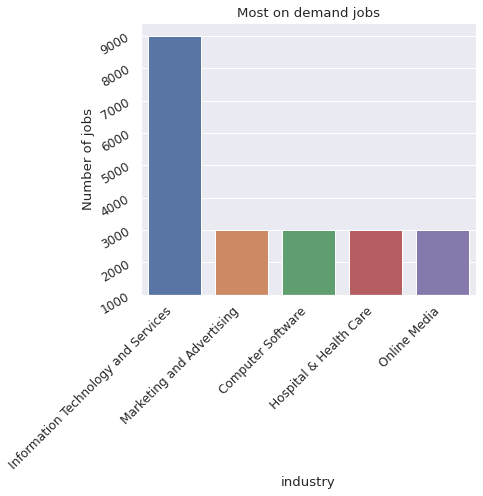

In [ ]:
chart = sns.countplot(fake_jobs['industry'][:6]);

#setting x and y ticklabels
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
chart.set_yticklabels(labels=np.arange(1000, 10000, 1000), rotation=30);

# title and y_label
chart.set_title("Most on demand jobs")
chart.set_ylabel('Number of jobs')

In [ ]:
fake_jobs['industry'].value_counts().head(20)

Information Technology and Services    6637
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Retail                                  223
Real Estate                             175
Accounting                              159
Construction                            158
E-Learning                              139
Management Consulting                   130
Design                                  129
Health, Wellness and Fitness            127
Staffing and Recruiting                 127
Insurance                               123
Name: industry, dtype: int64

### Percentage of employment type

In [ ]:
fake_jobs['employment_type'].value_counts(normalize=True) * 100

Full-time    84.401566
Contract      8.523490
Part-time     4.457494
Temporary     1.347875
Other         1.269575
Name: employment_type, dtype: float64

### Is there a difference in required experience?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Most required_experience')

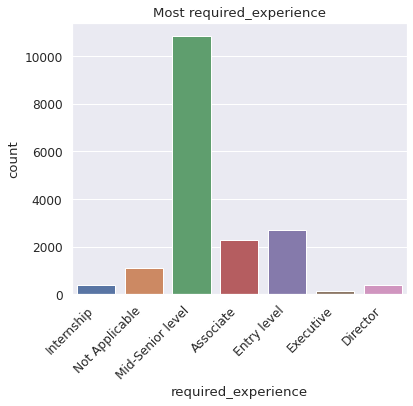

In [ ]:
chart = sns.countplot(fake_jobs['required_experience'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');

# title and y_label
chart.set_title("Most required_experience")

### What is the fraudulent percentage

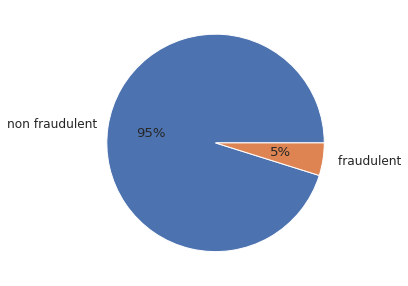

In [ ]:
keys = ['non fraudulent', ' fraudulent']
g = plt.pie(fake_jobs['fraudulent'].value_counts(), labels=keys, autopct='%.0f%%');

### What is the fraudulent for the top 5 industries?

In [ ]:
fake_jobs.groupby('fraudulent')['industry'].value_counts(normalize=True)[1].head(4) * 100

industry
Information Technology and Services    35.450346
Oil & Energy                           12.586605
Accounting                              6.581986
Hospital & Health Care                  5.889145
Name: industry, dtype: float64

## Preprocessing

In [ ]:
Features = fake_jobs.iloc[:, :9]
Target = fake_jobs.iloc[:, 9]

In [ ]:
# pip install tpot

In [ ]:
from tpot import TPOTClassifier

In [ ]:
pipeline_optimizer = TPOTClassifier()
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

new_list = [] #to store the new values

for i in Features:
  label_ids = label_encoder.fit_transform(fake_jobs[i])
  new_list.append(label_ids)

In [ ]:
new_data = np.array(new_list)

y = np.array(Target)
X = np.array(new_data).transpose()

In [ ]:
X.shape, y.shape

((17880, 9), (17880,))

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# using Tpot to select the best model
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Average CV score on the training set was: 0.9720339745086626
exported_pipeline = XGBClassifier(learning_rate=0.5, max_depth=6, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)

# Fit XGBClassifier to the training set
exported_pipeline.fit(X_train, y_train)

# Predict y_pred
y_pred = exported_pipeline.predict(X_test)

# Evaluate accuracy
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of xgboost: {:.2f}'.format(acc_test))

Test set accuracy of xgboost: 0.98
